<center> <img width=60% src="https://editor.analyticsvidhya.com/uploads/50662High-employee-turnover.jpg"> </center>

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Loading Data**](#Section41)
  - **4.2** [**Data Description**](#Section42)
  - **4.3** [**Data Information**](#Section43)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Handling of Missing Data**](#Section51)
  - **5.2** [**Handling of Redundant Data**](#Section52)
  - **5.3** [**Handling of Inconsistent Data**](#Section53)
  - **5.4** [**Handling of Typo**](#Section54)

**6.** [**Exploratory Data Analysis**](#Section6)<br>
  - **6.1** [**Age wise Division**](#Section61)<br> 
  - **6.2** [**Gender-wise and MaritalStatus-wise divisions**](#Section62)<br>
  - **6.3** [**Department-wise plots**](#Section63)<br>  
  - **6.4** [**Heatmap (numeric variables)**](#Section64)<br>  
  - **6.5** [**Pair-wise Plots (numeric variables)**](#Section65)<br> 
  - **6.6** [**Very Interesting Insights (numeric variables)**](#Section66)<br> 

**7.** [**Data Post-Processing**](#Section7)<br>
  - **7.1** [**Data Encoding**](#Section71)<br> 
  - **7.2** [**Data Scaling**](#Section72)<br>
  - **7.3** [**Data Preparation**](#Section73)<br>
  - **7.4** [**Feature Importance**](#Section74)<br>

**8.** [**Model Development & Evaluation**](#Section8)<br>
  - **8.1** [**Logistic Regression**](#Section81)<br> 
  - **8.2** [**SVM**](#Section82)<br>
  - **8.3** [**KNN-Baseline**](#Section83)<br>
  - **8.4** [**Random Forest**](#Section84)<br>
  - **8.5** [**Random Forest with RndomizedSearchCV**](#Section85)<br>

**9.** [**Model Comparison**](#Section9)<br>
  - **9.1** [**Score Comparison**](#Section91)<br>
  - **9.2** [**K-FOLD Cross Validation**](#Section92)<br>

**10.** [**Final Submission**](#Section10)<br>
  - **10.1** [**Loading Unseen Data**](#Section101)<br>
  - **10.2** [**Cleaning Unseen Data**](#Section102)<br>
  - **10.3** [**Final Prediction**](#Section103)<br>
  - **10.4** [**Saving To CSV**](#Section104)<br>

            

---
<a name = Section1></a>
# **1. Introduction**
---


- Employee attrition is when an employee leaves the company through any method, including voluntary resignations, layoffs, failure to return from a leave of absence, or even illness or death.
- High attrition rates for employees are often due to poor job satisfaction, an aging workforce, spending cuts, or increased competition.


- The direct impacts are relatively easy to measure: costs must be incurred to recruit and train new employees. During the recruitment process, other employees generally see an increase in their workload which can result overtime costs, but also affect their own productivity
- We’re going to create an algorithm for employee attrition prediction i.e. predicting that employee will leave the current company or will resign from the current company.


---
<a name = Section2></a>
# **2. Problem Statement**
---

## Current Practice

- Once an employee leaves, he or she is taken an interview with the name “exit interview” and shares reasons for leaving. 
- The HR Department then tries and learns insights from the interview and makes changes accordingly.
<center> <img width=60% src="https://theinvestorsbook.com/wp-content/uploads/2019/10/Purpose-of-Exit-Interviews.jpg"> </center>

## This suffers from the following problems:

   1. This approach is that it's too haphazard. The quality of insight gained from an interview depends heavily on the            skill of the interviewer.
   2. The second problem is these insights can't be aggregated and interlaced across all employees who have left.
   3. The third is that it is too late by the time the proposed policy changes take effect.






**Our Objective**
  
  - The HR Department at a software company want to try a new initiative to retain employees.
  - The idea is to use data to predict whether an employee is likely to leave.
  - Once these employees are identified, HR can be more proactive in reaching out to them before it's too late.
  - They only want to deal with the data that is related to permanent employees.
   
   <center> <img width=60% src="https://www.springml.com/wp-content/uploads/2020/08/employee-attrition.png"> </center>



The HR department has hired you as data science consultants. They want to supplement their exit interviews with a more proactive approach.

---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing Libraries**


In [1]:
!pip install -q datascience                           
!pip install -q pandas-profiling                      
!pip install mysql-connector-python                   

     |████████████████████████████████| 69 kB 3.5 MB/s 
     |████████████████████████████████| 25.2 MB 1.3 MB/s 


<a name = Section32></a>
### **3.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync. 

- Make sure not to execute the cell above (3.1) and below (3.2) again after restarting the runtime.

In [2]:
#!pip install -q --upgrade pandas-profiling

3.   Restart Runtime again 
4.   Run step 2 again
5.   Run the code below (to install the other libraries)

<a name = Section33></a>
### **3.3 Importing Libraries**

In [3]:
# -------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
#from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
from scipy.stats import randint as sp_randint                       # for initializing random integer values
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
from matplotlib.pylab import rcParams                               # Backend used for rendering and GUI integration                                               
import seaborn as sns                                               # Importin seaborm library for interactive visualization
from plotly.subplots import make_subplots                           # Importing to create subplots in plotly
import plotly.graph_objects as go                                   # Importing to make interactive plots  
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import accuracy_score                          # For calculating the accuracy for the model
from sklearn.metrics import precision_score                         # For calculating the Precision of the model
from sklearn.metrics import recall_score                            # For calculating the recall of the model
from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import confusion_matrix                        # For verifying model performance using confusion matrix
from sklearn.metrics import plot_confusion_matrix                   # To plot confusion matrix
from sklearn.metrics import f1_score                                # For Checking the F1-Score of our model  
from sklearn.metrics import roc_curve                               # For Roc-Auc metric estimation
from sklearn.calibration import CalibratedClassifierCV              # For caliberating the predict_proba
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LogisticRegression                 # Logisc Regression Classifier
from sklearn import svm                                             # SVM classifier
from sklearn.neighbors import KNeighborsClassifier                  # To instantiate a KNN Classifier
from sklearn.ensemble import RandomForestClassifier                 # To create the RandomForest Model
from sklearn.model_selection import KFold                           # To create k folds for cross validation
from sklearn.model_selection import cross_validate                  # To calculate cross validation scores
from sklearn.model_selection import RandomizedSearchCV              # to create a RandomSearched hyper-tuned model
from sklearn.preprocessing import RobustScaler                      # to scale the data based on their inter-quartile range
from sklearn.model_selection import GridSearchCV                    # To tune the models
#-------------------------------------------------------------------------------------------------------------------------------
import time                                                         # Importing to calculate time
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

- DB Connection

In [4]:
#------ DB Connection ------
import mysql.connector
mydb = mysql.connector.connect(
 user='student', password='student',
 host='cpanel.insaid.co',
 database='Capstone2')

mycursor = mydb.cursor()

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---
- The Business Intelligence Analysts of the Company provided you **three datasets** that contain information about past employees and their status (still employed or already left).
-  **3 tables** are as below...

**Table No. 1**

##### ***department_data***

This dataset contains information about each department. The schema of the dataset is as follows:

   1. **dept_id** – Unique Department Code
   2. **dept_name** – Name of the Department
   3. **dept_head** – Name of the Head of the Department

**Table No. 2**   

##### ***employee_details_data***

This dataset consists of **Employee ID, their Age, Gender and Marital Status**. The schema of this dataset is as follows:

   1. **employee_id** – Unique ID Number for each employee
   2. **age** – Age of the employee
   3. **gender** – Gender of the employee
   4. **marital_status** – Marital Status of the employee

**Table No. 3**
##### ***employee_data***

This dataset consists of each employee’s **Administrative Information, Workload Information, Mutual Evaluation Information and Status**.

##### **Target variable**

   1. **status** – Current employment status (Employed / Left)
    
##### **Administrative information**

   1. **department** – Department to which the employees belong(ed) to
   2. **salary** – Salary level with respect to rest of their department
   3. **tenure** – Number of years at the company
   4. **recently_promoted** – Was the employee promoted in the last 3 years?
   5. **employee_id** – Unique ID Number for each employee
    
##### **Workload information**

   1. **n_projects** – Number of projects employee has worked on
   2. **avg_monthly_hrs** – Average number of hours worked per month
    
##### **Mutual evaluation information**

   1. **satisfaction** – Score for employee’s satisfaction with the company (higher is better)
   2. **last_evaluation** – Score for most recent evaluation of employee (higher is better)
   3. **filed_complaint** – Has the employee filed a formal complaint in the last 3 years?



<a name = Section41></a>
### **4.1 Loading and Analyzing the Raw Data**

-  Function get table data as a data frame 

In [5]:
# --- Function get table data as a data frame ---
def getTableDataAsDataFrame(dbCursor, tableName):

  ## Get the Columns  of the table
  dbCursor.execute("show columns from " + tableName)
  cols_result = dbCursor.fetchall()
  cols_df = pd.DataFrame(cols_result)
  cols = cols_df.iloc[:, 0]

  ## Then, get the data stored into a DataFrame
  dbCursor.execute("select * from " + tableName)
  table_data_result = dbCursor.fetchall()
  table_data_df = pd.DataFrame(table_data_result, columns = cols)
  
  ## return the Table data as a DataFrame
  return table_data_df


- **TABLES of the DATABASE** 


1. Department Table

In [6]:
# === TABLES of the DATABASE ===

# Department Table
department_data_df = getTableDataAsDataFrame(mycursor, 'department_data')

print('Shape of Department data is',department_data_df.shape)
print(department_data_df.head(department_data_df.shape[0]))
print('Contains Duplicate Rows?', department_data_df.duplicated().any())

Shape of Department data is (11, 3)
0   dept_id    dept_name              dept_head
0    D00-IT           IT             Henry Adey
1    D00-SS        Sales        Edward J Bayley
2    D00-TP         Temp        Micheal Zachrey
3   D00-ENG  Engineering  Sushant Raghunathan K
4    D00-SP      Support         Amelia Westray
5    D00-FN      Finance              Aanchal J
6    D00-PR  Procurement            Louie Viles
7    D00-AD        Admin          Evelyn Tolson
8    D00-MN   Management          Ellie Trafton
9    D00-MT    Marketing           Reuben Swann
10   D00-PD      Product          Darcy Staines
Contains Duplicate Rows? False



- **department_data** table have 11 records and 3 columns.

- All 3 columns are object type and No **Null** values
 

-----------------------------------------------------------
2. Employee Details Table

In [7]:
# Employee Details table
employee_details_data_df = getTableDataAsDataFrame(mycursor, 'employee_details_data')
print(employee_details_data_df.head())
print('Shape of employee details data is' ,employee_details_data_df.shape)
print('Contains Duplicate Rows?', employee_details_data_df.duplicated().any())


0  employee_id  age  gender marital_status
0       113558   43    Male        Married
1       112256   24  Female      Unmarried
2       112586   22  Female      Unmarried
3       108071   36    Male        Married
4       116915   38    Male        Married
Shape of employee details data is (14245, 4)
Contains Duplicate Rows? False



- **employee_details_data** table have 14245 records and 4 columns. 2 are Integer columns and 2 are categorical.

- There is No **Null** values
 

-----
3. Employee Data
 - **MAIN TABLE**, Has most of the Features required for the model.

In [8]:
# Employee data
### MAIN TABLE, Has most of the Features required for the model ###
employee_data_df = getTableDataAsDataFrame(mycursor, 'employee_data')
display(employee_data_df.head(10))
display('Shape of employee data is',employee_data_df.shape)



,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
0,246.00,None,None,0.86684,6,NaN,medium,0.13442,Left,4.00,124467
1,134.00,None,None,0.55572,2,NaN,low,0.51104,Left,3.00,112210
2,156.00,D00-SS,1.00,0.47408,2,NaN,medium,0.40510,Left,3.00,126150
3,256.00,D00-SP,None,0.96136,6,NaN,low,0.15297,Left,4.00,125346
4,146.00,D00-SS,None,0.50735,2,NaN,medium,0.43484,Left,3.00,113707
5,135.00,D00-MT,None,0.48218,2,NaN,low,0.38155,Left,3.00,121685
6,270.00,D00-PD,None,0.86709,6,NaN,low,0.17258,Left,4.00,119912
7,244.00,D00-IT,None,0.92620,6,NaN,medium,0.06187,Left,5.00,112868
8,289.00,D00-IT,None,0.92986,7,NaN,low,0.16174,Left,4.00,122314
9,281.00,D00-SS,None,0.90797,6,NaN,medium,0.10575,Left,4.00,122394


'Shape of employee data is'

(14150, 11)

 **Initial Observations**

- Total 11 Departments in company.
- Employee features are available in 2 tables.
- Table with maximum features will be our main table and we will merge those tables with respect to employee ID.

In [9]:
data=pd.merge(left=employee_data_df, right=employee_details_data_df, on='employee_id', how='inner')
print(data.head(5))
data.shape
print('Contains Duplicate Rows?', data.duplicated().any())
print('Number of Duplicate Rows?', data.duplicated().sum())

0 avg_monthly_hrs department filed_complaint  last_evaluation  n_projects  \
0          246.00       None            None          0.86684           6   
1          134.00       None            None          0.55572           2   
2          156.00     D00-SS            1.00          0.47408           2   
3          256.00     D00-SP            None          0.96136           6   
4          146.00     D00-SS            None          0.50735           2   

0  recently_promoted  salary  satisfaction status tenure  employee_id  age  \
0                NaN  medium       0.13442   Left   4.00       124467   42   
1                NaN     low       0.51104   Left   3.00       112210   23   
2                NaN  medium       0.40510   Left   3.00       126150   24   
3                NaN     low       0.15297   Left   4.00       125346   51   
4                NaN  medium       0.43484   Left   3.00       113707   23   

0  gender marital_status  
0  Female        Married  
1  Female     

- There were 14150 entries in main Employee data.
- After merging on Employee ID we got 14145 entries and 14 features.
- Only 5 enries lost which is OK.
- **29 duplicate** rows in data.

<a name = Section42></a>
### **4.2 Data Description**

- In this section we will get **information about the data** and see some observations.

In [10]:
data.describe(include='all')

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status
count,14145,13439,2046,12658.00000,14145.00000,297.00000,14145,13995.00000,14145,13995,14145.00000,14145.00000,14145,14145
unique,249,12,1,NaN,NaN,NaN,3,NaN,2,8,NaN,NaN,2,2
top,135.00,D00-SS,1.00,NaN,NaN,NaN,low,NaN,Employed,3.00,NaN,NaN,Male,Unmarried
freq,144,3904,2046,NaN,NaN,NaN,6902,NaN,10782,6016,NaN,NaN,9304,7226
mean,NaN,NaN,NaN,0.71841,3.77794,1.00000,NaN,0.62130,NaN,NaN,112120.36875,32.89862,NaN,NaN
std,NaN,NaN,NaN,0.17310,1.24993,0.00000,NaN,0.25044,NaN,NaN,8492.09939,9.97894,NaN,NaN
min,NaN,NaN,NaN,0.31617,1.00000,1.00000,NaN,0.04006,NaN,NaN,100101.00000,22.00000,NaN,NaN
25%,NaN,NaN,NaN,0.56377,3.00000,1.00000,NaN,0.45039,NaN,NaN,105780.00000,24.00000,NaN,NaN
50%,NaN,NaN,NaN,0.72464,4.00000,1.00000,NaN,0.65245,NaN,NaN,111296.00000,29.00000,NaN,NaN
75%,NaN,NaN,NaN,0.87141,5.00000,1.00000,NaN,0.82496,NaN,NaN,116653.00000,41.00000,NaN,NaN


**Observations**

*   **All employees have a valid, non null employee_id**
*   There are 12 entries in department but company have only 11 departments so eed to check department values.


In [11]:
data['department'].unique()

array([None, 'D00-SS', 'D00-SP', 'D00-MT', 'D00-PD', 'D00-IT', 'D00-AD',
       'D00-MN', 'D00-ENG', 'D00-PR', 'D00-TP', 'D00-FN', '-IT'],
      dtype=object)

*  There is an entrie with name  **"-IT" in department** column. However, this "-IT" seems like a typo.This has ***to be replaced*** by the only match from department_data, **"D00-IT"**

In [12]:
print('values in filed complaint column', data['filed_complaint'].value_counts())
print('values in recently promoted column', data['recently_promoted'].value_counts())

values in filed complaint column 1.00    2046
Name: filed_complaint, dtype: int64
values in recently promoted column 1.00000    297
Name: recently_promoted, dtype: int64


<a name = Section43></a>
### **4.3 Data Information**

- In this section we will see the **information about the types of features**.

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14145 entries, 0 to 14144
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14145 non-null  object 
 1   department         13439 non-null  object 
 2   filed_complaint    2046 non-null   object 
 3   last_evaluation    12658 non-null  float64
 4   n_projects         14145 non-null  int64  
 5   recently_promoted  297 non-null    float64
 6   salary             14145 non-null  object 
 7   satisfaction       13995 non-null  float64
 8   status             14145 non-null  object 
 9   tenure             13995 non-null  object 
 10  employee_id        14145 non-null  int64  
 11  age                14145 non-null  int64  
 12  gender             14145 non-null  object 
 13  marital_status     14145 non-null  object 
dtypes: float64(3), int64(3), object(8)
memory usage: 1.6+ MB


**Observations**

*    There are **706 entries** in employee_data that **do Not have an associated department**. We shouldn't scrap them, because other fields are there, which have valid values. 
Besides, we'll see how much of a weightage does "department" hold to the final outcome. If not much, we will drop "department"
*   5 columns have **Null** values and they are: filed_complaint, last_evaluation, recently_promoted, satisfaction, tenure
*   **filed_complaint** has too few records, 2046, which is << 14k+ records of the data frame. 
*   **filed_complaint** and **recently_promoted** are object and float64 respectively but they must be bool. 
*   **recently_promoted** too has even fewer records, 297.
*   avg_monthly_hrs and tenure are an object should be float64






<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Handling of Missing Data**

- In this section, we will identify missing data and check the proportion of it and take appropriate measures.

1. 6 categorical, 7 numerical and 1 boolean variable

2. **28440 cells** have missing values.

    a. **Department** have 706 null values fill them with mode.

    b. **filed_compliant** have 12099 (85%) and have only 1 unique value in non-null cells,
    
    c. **Last_evaluation** have 1487 null values fill them with mean.
    
    d. **recently_promoted** have 13848 (97%) and have only 1 unique value in non-null cells
    
    e. **satisfaction** and **tenure**  have 150 null values , fill them with median.
    





In [14]:
## Init
df = data

# Categorical, so fill with mode
df.department = df.department.fillna(df['department'].mode()[0])#filling null value with the Mode of the department.

# Mean because of almost nill skew
mean_last_evaluation = df.last_evaluation.mean()#calculating the mean of the last_evaluation
df.last_evaluation.fillna(mean_last_evaluation, inplace = True)#filling null values with the mean

# Median, because of the skew
median_satisfaction = df.satisfaction.median()#calculating the median of the satisfaction
df.satisfaction.fillna(median_satisfaction, inplace = True)#filling null values with the median

# Median, because of the skew
median_tenure = df.tenure.median()#calculating the median of the tenure
df.tenure.fillna(median_tenure, inplace = True)#filling null values with the median of tenure



**Dealing with sparse data columns**

- In this section we will deal with columns having **too little data**

- ***filed_complaint*** (only 2046 entrues)
- ***recently_promoted*** (only 297 entries)

Normally we would scrap columns with too little data.

- ***But here, if we observe, all those data is only '1', and there's no '0' or other values.***

- ***We can conclude that, the rest which are nulls are False cases. That is, they have not filed a complaint, & have not been recently promoted***

So, fill these columns as:
- filed_complaint: fill nulls with 0s. Which means, they haven't filed a complaint
- recently_promoted: Similar lines. '0' means they haven't been recently promoted



In [15]:
df.filed_complaint.fillna(0, inplace = True)
df.recently_promoted.fillna(0, inplace = True)

<a name = Section52></a>
### **5.2 Handling of Redundant Data**

- In this section, we will identify redundant data and check the proportion of it and take appropriate measures.
- From the Pre-Profiling report, we see that there are 29 duplicate rows

In [16]:
df.drop_duplicates(subset ="employee_id", inplace = True)
df.shape

(14116, 14)

<a name = Section53></a>
### **5.3 Handling of Inconsistent Data**


In [17]:
## Type casting
convert_dict = {'avg_monthly_hrs': float, 
                'filed_complaint': int,
                'recently_promoted': int,
                'tenure': float } 
df = df.astype(convert_dict)  
print(df.dtypes)
#display(df.head(20))


0
avg_monthly_hrs      float64
department            object
filed_complaint        int64
last_evaluation      float64
n_projects             int64
recently_promoted      int64
salary                object
satisfaction         float64
status                object
tenure               float64
employee_id            int64
age                    int64
gender                object
marital_status        object
dtype: object


<a name = Section54></a>
### **5.4 Handling of typos**


**Correct Department Typo errors**

In [18]:
pd.array(department_data_df.dept_id)

<PandasArray>
[ 'D00-IT',  'D00-SS',  'D00-TP', 'D00-ENG',  'D00-SP',  'D00-FN',  'D00-PR',
  'D00-AD',  'D00-MN',  'D00-MT',  'D00-PD']
Length: 11, dtype: object

In [19]:
pd.array(department_data_df.dept_name)

<PandasArray>
[         'IT',       'Sales',        'Temp', 'Engineering',     'Support',
     'Finance', 'Procurement',       'Admin',  'Management',   'Marketing',
     'Product']
Length: 11, dtype: object

In [20]:
df['department'].replace(to_replace=['D00-IT','D00-SS','D00-TP','D00-ENG','D00-SP','D00-FN','D00-PR','D00-AD','D00-MN','D00-MT','D00-PD','-IT'],
                      value=['IT','Sales','Temp','Engineering','Support','Finance','Procurement','Admin','Management','Marketing','Product','IT'],
                      inplace=True)
df['department'].unique()

array(['Sales', 'Support', 'Marketing', 'Product', 'IT', 'Admin',
       'Management', 'Engineering', 'Procurement', 'Temp', 'Finance'],
      dtype=object)

<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---

In [21]:
## Display data ##
print('\n================Describe ================')
display(df.describe(include='all'))

print('\n\n================ Info ===================')
display(df.info())

print('\n\n================ Show ===================')
display(df.head())

print('\n\n================ Shape ===================')
display(df.shape)


================Describe ================


,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status
count,14116.00000,14116,14116.00000,14116.00000,14116.00000,14116.00000,14116,14116.00000,14116,14116.00000,14116.00000,14116.00000,14116,14116
unique,NaN,11,NaN,NaN,NaN,NaN,3,NaN,2,NaN,NaN,NaN,2,2
top,NaN,Sales,NaN,NaN,NaN,NaN,low,NaN,Employed,NaN,NaN,NaN,Male,Unmarried
freq,NaN,4601,NaN,NaN,NaN,NaN,6889,NaN,10761,NaN,NaN,NaN,9287,7211
mean,199.99263,NaN,0.14459,0.71833,3.77777,0.02104,NaN,0.62165,NaN,3.49242,112120.65776,32.89600,NaN,NaN
std,50.82695,NaN,0.35170,0.16370,1.24969,0.14352,NaN,0.24915,NaN,1.45355,8497.63940,9.97500,NaN,NaN
min,49.00000,NaN,0.00000,0.31617,1.00000,0.00000,NaN,0.04006,NaN,2.00000,100101.00000,22.00000,NaN,NaN
25%,155.00000,NaN,0.00000,0.57952,3.00000,0.00000,NaN,0.45283,NaN,3.00000,105773.50000,24.00000,NaN,NaN
50%,199.00000,NaN,0.00000,0.71841,4.00000,0.00000,NaN,0.65245,NaN,3.00000,111293.50000,29.00000,NaN,NaN
75%,245.00000,NaN,0.00000,0.85685,5.00000,0.00000,NaN,0.82296,NaN,4.00000,116655.25000,41.00000,NaN,NaN




================ Info ===================
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14116 entries, 0 to 14144
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14116 non-null  float64
 1   department         14116 non-null  object 
 2   filed_complaint    14116 non-null  int64  
 3   last_evaluation    14116 non-null  float64
 4   n_projects         14116 non-null  int64  
 5   recently_promoted  14116 non-null  int64  
 6   salary             14116 non-null  object 
 7   satisfaction       14116 non-null  float64
 8   status             14116 non-null  object 
 9   tenure             14116 non-null  float64
 10  employee_id        14116 non-null  int64  
 11  age                14116 non-null  int64  
 12  gender             14116 non-null  object 
 13  marital_status     14116 non-null  object 
dtypes: float64(4), int64(5), object(5)
memory usage: 1.6+ MB


None



================ Show ===================


,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status
0,246.00000,Sales,0,0.86684,6,0,medium,0.13442,Left,4.00000,124467,42,Female,Married
1,134.00000,Sales,0,0.55572,2,0,low,0.51104,Left,3.00000,112210,23,Female,Unmarried
2,156.00000,Sales,1,0.47408,2,0,medium,0.40510,Left,3.00000,126150,24,Female,Unmarried
3,256.00000,Support,0,0.96136,6,0,low,0.15297,Left,4.00000,125346,51,Female,Married
4,146.00000,Sales,0,0.50735,2,0,medium,0.43484,Left,3.00000,113707,23,Female,Unmarried




================ Shape ===================


(14116, 14)

In [22]:
pd.crosstab(index=data['filed_complaint'], columns=df['status'])


status,Employed,Left
filed_complaint,,
0,8872,3203
1.00,1889,152


- 26.5% of employees who didn't filed complaint have left and only 93% of employees who did filed complaint are still employed.
- So we can conclude that many employees left without filing any complaint and majority of employees complaints has been resolved.
- And Filed complaint is not relevent to status of employee.

In [23]:
pd.crosstab(index=data['recently_promoted'], columns=df['status'])

status,Employed,Left
recently_promoted,,
0.00000,10482,3337
1.00000,279,18


- 93.9% of employees who had been promoted are still employed.

**Pre-Profiling Report**


In [24]:
#!pip install pandas-profiling==2.7.1
#profile = ProfileReport(df = employeeRawData_df)
#profile.to_file(output_file = 'Employee Data Pre-Profiling Report.html')
#print('Accomplished!')

In [25]:
#from google.colab import files                   # Use only if you are using Google Colab, otherwise remove it
#files.download('Employee Data Pre-Profiling Report.html')      # Use only if you are using Google Colab, otherwise remove it

In [26]:
def ShowHBarValue():
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{width}', (x + width*1.02, y + height/2), va='center')

def ShowHBarPer():
    totals = []
    for i in ax.patches:
        totals.append(i.get_width())
    total = sum(totals)
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{width/total:.0%}', (x + width*1.02, y + height/2), va='center')
        
def ShowVBarValue():
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')

def ShowVBarPer():
    totals = []
    for i in ax.patches:
        totals.append(i.get_height())
    total = sum(totals)
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height/total:.0%}', (x + width/2, (y + height*1.02) ), ha='center')
        
def age_group_function1(x):
    if x['age'] <=30:
        return('20-30')
    elif x['age'] <=40:
        return('31-40')
    elif x['age'] <= 50:
        return('41-50')
    else:
        return('51-60')

<a name = Section61></a>
## **6.1 Age wise divisions**

<a name = Section611></a>
#### **6.1.1. AgeCategory-wise divisions**




In [27]:
df['Age Category'] = df.apply(age_group_function1,axis=1)

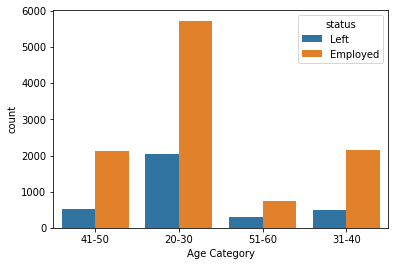

In [28]:
fig,ax= plt.subplots(figsize=(6,4))
sns.countplot(data=df, x='Age Category', hue='status')

<a name = Section612></a>
#### **6.1.2. Age distribution**


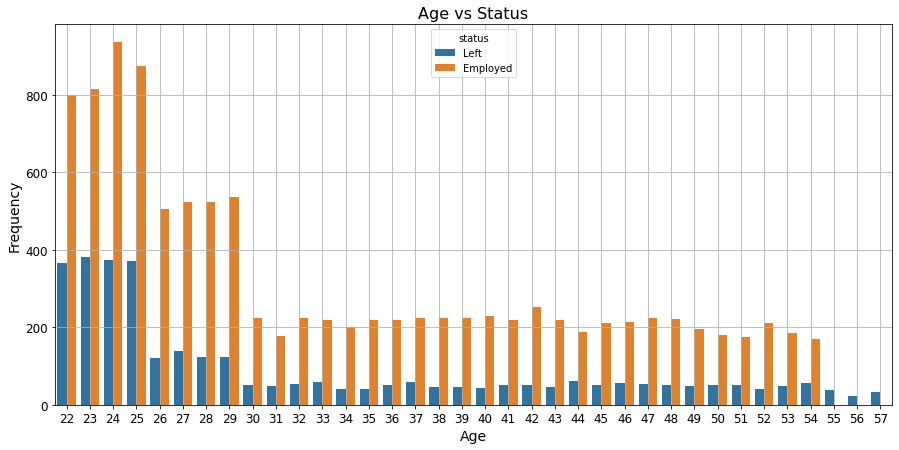

In [29]:
# Initialize figure of size 15 X 7
fig = plt.figure(figsize=(15, 7))

# Plot countplot of age concerning treatment
sns.countplot(x='age', hue='status', data=df)

# Add some cosmetics
plt.title(label='Age vs Status', size=16)
plt.xlabel(xlabel='Age', size=14)
plt.ylabel(ylabel='Frequency', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.grid(b=True)

# Display the plot
plt.show()

- Majority of employees in the company are young.
- Also maximum share of employees left are young, young people tend to leave for better opportunities.

<a name = Section62></a>
## **6.2. Gender-wise and MaritalStatus-wise divisions**

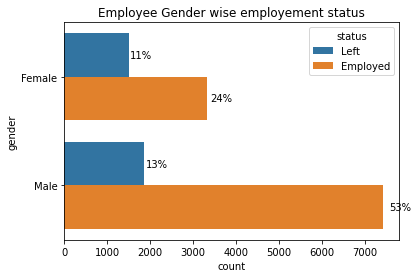

In [30]:
fig,ax= plt.subplots(figsize=(6,4))
sns.countplot(data=df, y='gender', hue='status')
plt.title('Employee Gender wise employement status')

ShowHBarPer()

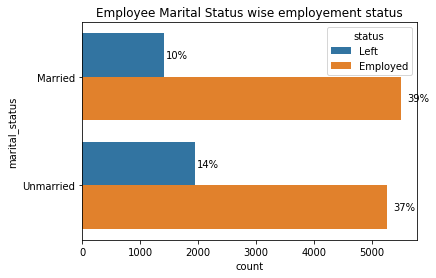

In [31]:
fig,ax= plt.subplots(figsize=(6,4))
sns.countplot(data=df, y='marital_status', hue='status')
plt.title('Employee Marital Status wise employement status')
ShowHBarPer()


---
<a name = Section63></a>
## **6.3. Department-wise plots**
---

Text(0.5, 1.0, 'Department')

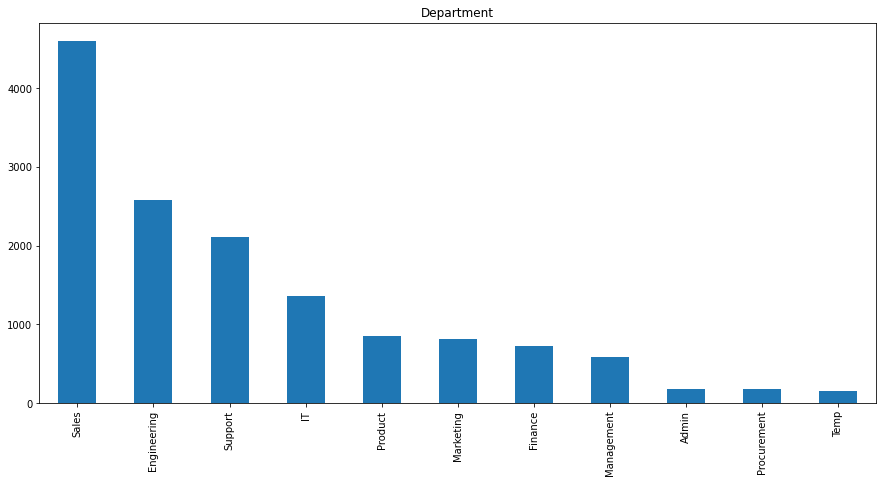

In [32]:
df['department'].value_counts().plot(kind='bar',figsize=(15,7))
plt.title('Department')

Text(0.5, 1.0, 'Employee department wise employement status')

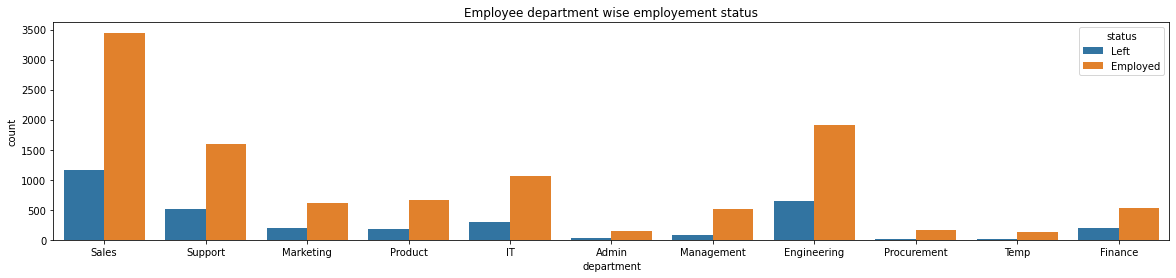

In [33]:
fig,ax= plt.subplots(figsize=(20, 4))
sns.countplot(data=df, x='department', hue='status')
plt.title('Employee department wise employement status')

<a name = Section64></a>
## **6.4. Heatmap (numeric variables)**


**Encoding target variable 'status' as 0 or 1 for showing up in Correlation data, such as Heatmaps**

In [34]:
employeeData_df = df

In [35]:
def status_encoding_function(x):
    if x['status'] == 'Left':
        return(1)
    
    else:
        return(0)

In [36]:
employeeData_df['StatusEncoded'] = employeeData_df.apply(status_encoding_function,axis=1)

In [37]:
employeeData_df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status,Age Category,StatusEncoded
0,246.00000,Sales,0,0.86684,6,0,medium,0.13442,Left,4.00000,124467,42,Female,Married,41-50,1
1,134.00000,Sales,0,0.55572,2,0,low,0.51104,Left,3.00000,112210,23,Female,Unmarried,20-30,1
2,156.00000,Sales,1,0.47408,2,0,medium,0.40510,Left,3.00000,126150,24,Female,Unmarried,20-30,1
3,256.00000,Support,0,0.96136,6,0,low,0.15297,Left,4.00000,125346,51,Female,Married,51-60,1
4,146.00000,Sales,0,0.50735,2,0,medium,0.43484,Left,3.00000,113707,23,Female,Unmarried,20-30,1


In [38]:
print(employeeData_df.shape)
employeeData_df.columns[:]

(14116, 16)


Index(['avg_monthly_hrs', 'department', 'filed_complaint', 'last_evaluation',
       'n_projects', 'recently_promoted', 'salary', 'satisfaction', 'status',
       'tenure', 'employee_id', 'age', 'gender', 'marital_status',
       'Age Category', 'StatusEncoded'],
      dtype='object', name=0)

In [39]:
## Get only the numeric features first: 'age', 'n_projects', 'avg_monthly_hrs', ' filed_complaint', 'recently_promoted', 'satisfaction', 'StatusEncoded'
## and o/p Target variable, 'StatusEncoded'

employeeData_Numeric_df = employeeData_df[['age', 'n_projects', 'avg_monthly_hrs', 'filed_complaint', 'recently_promoted', 'satisfaction', 'StatusEncoded']]
employeeData_Numeric_df.head()

,age,n_projects,avg_monthly_hrs,filed_complaint,recently_promoted,satisfaction,StatusEncoded
0,42,6,246.00000,0,0,0.13442,1
1,23,2,134.00000,0,0,0.51104,1
2,24,2,156.00000,1,0,0.40510,1
3,51,6,256.00000,0,0,0.15297,1
4,23,2,146.00000,0,0,0.43484,1


Text(0.5, 1.0, 'Correlation between features')

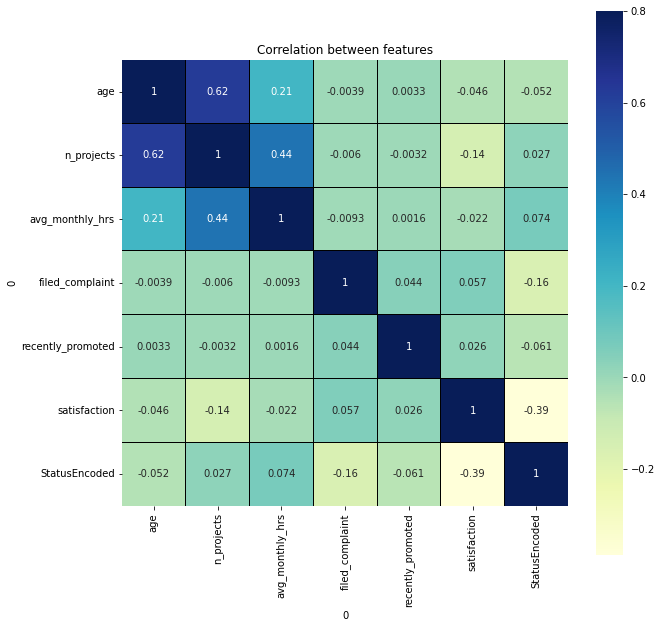

In [40]:
corr = employeeData_Numeric_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

Here I am using a custom notation <-> to denote correlation

***The following was obtained from the Pre-Processing Report***


**Target variable: status**

*   status <-> n_projects, avg_monthly_hrs, satisfaction


**Other Correlations, and possible chances of Multicollinearity**

*   age <-> n_projects, marital_status
*   n_projects <-> age, marital_status, satisfaction, avg_monthly_hrs, status
*   marital_status <-> age, n_projects, 
*   avg_monthly_hrs <-> n_projects, status
*   satisfaction <-> n_projects, status



**But first, let's check correlations on heatmap, etc**



**Observations:**


We can see that there is a decently strong positive correlation between **age**, and **no. of projects**

Let's draw pairwise plots to get a better understanding

<a name = Section65></a>
## **6.5. Pair-wise Plots (numeric variables)**

Text(0.5, 1.0, 'Pair Plot')

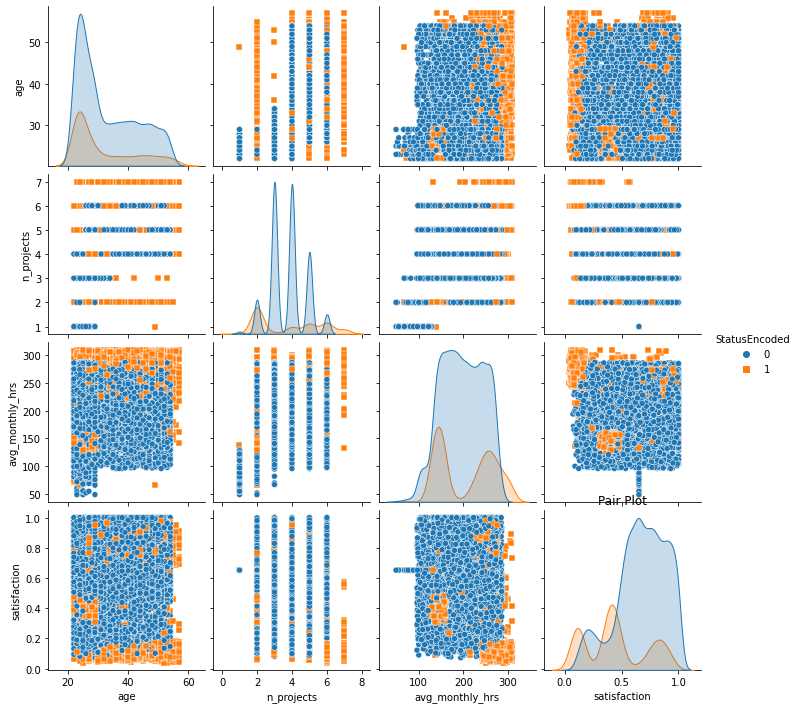

In [41]:
sns.pairplot(employeeData_Numeric_df[['age', 'n_projects', 'avg_monthly_hrs', 'satisfaction', 'StatusEncoded']],
             vars = ['age', 'n_projects', 'avg_monthly_hrs', 'satisfaction'],
             hue="StatusEncoded", dropna=True,markers=["o", "s"])
plt.title('Pair Plot')

In [42]:
employeeData_Numeric_df.shape

(14116, 7)

<a name = Section66></a>
## **6.6. Very Interesting Insights (numeric variables)**








**Legends:**
(StatusEncoded)
0 => Employed
1 => Left

If we check the diagonal plots, we'll see:

*   More employees among those with higher satisfaction score (> 0.5) have stayed, instead of leaving

*   Most employees with median average monthly hours of around 200, have stayed than left. The attrition increases with too less hours, or too much hours (probably overworked)

*   More people left when no. of projects <=2, or >=6. That is too less, or too more

*   In the age group of 20-40, there has been both high attrition and retention. One possibility maybe, people changing jobs (for the attrition) in their younger years. Or staying back during the formative years of their careers


Other Observations from the other plots:
age-vs-no of projects

*   Irrespective of the age, among the employees having >=7 projects, most have left.
*   Same goes for too less projects. Such as only 2 projects.
*   Interestingly, those with 1 projects, most have stayed




---
<a name = Section7></a>
# **7. Data Post Processing (before model creation)**
---

In [43]:
employeeData_df.shape

(14116, 16)

---
<a name = Section71></a>
## **7.1. Data Encoding**
---

---
<a name = Section711></a>
### **7.1.1. One-Hot Encoding Categorical variables such as gender, marital_status, etc.**
---

In [44]:
employeeData_df = pd.get_dummies(employeeData_df, columns=['gender','marital_status', 'department', 'salary', 'Age Category'], drop_first=False)

In [45]:
employeeData_df.head()


,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,status,tenure,employee_id,age,StatusEncoded,gender_Female,gender_Male,marital_status_Married,marital_status_Unmarried,department_Admin,department_Engineering,department_Finance,department_IT,department_Management,department_Marketing,department_Procurement,department_Product,department_Sales,department_Support,department_Temp,salary_high,salary_low,salary_medium,Age Category_20-30,Age Category_31-40,Age Category_41-50,Age Category_51-60
0,246.00000,0,0.86684,6,0,0.13442,Left,4.00000,124467,42,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
1,134.00000,0,0.55572,2,0,0.51104,Left,3.00000,112210,23,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
2,156.00000,1,0.47408,2,0,0.40510,Left,3.00000,126150,24,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
3,256.00000,0,0.96136,6,0,0.15297,Left,4.00000,125346,51,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
4,146.00000,0,0.50735,2,0,0.43484,Left,3.00000,113707,23,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0


In [46]:
employeeData_df.shape

(14116, 33)

---
<a name = Section712></a>
### **7.1.2 Dropping older 'status', renaming 'StatusEncoded' to 'status'**
---

The older 'status' was a categorical variable.
The newer one is numeric.
1 => Left
0 => Employed

In [47]:
employeeData_df.drop(columns=['status'], inplace=True)
employeeData_df.rename(columns = {'StatusEncoded':'status'}, inplace = True)

employeeData_df.head()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,employee_id,age,status,gender_Female,gender_Male,marital_status_Married,marital_status_Unmarried,department_Admin,department_Engineering,department_Finance,department_IT,department_Management,department_Marketing,department_Procurement,department_Product,department_Sales,department_Support,department_Temp,salary_high,salary_low,salary_medium,Age Category_20-30,Age Category_31-40,Age Category_41-50,Age Category_51-60
0,246.00000,0,0.86684,6,0,0.13442,4.00000,124467,42,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
1,134.00000,0,0.55572,2,0,0.51104,3.00000,112210,23,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
2,156.00000,1,0.47408,2,0,0.40510,3.00000,126150,24,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
3,256.00000,0,0.96136,6,0,0.15297,4.00000,125346,51,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
4,146.00000,0,0.50735,2,0,0.43484,3.00000,113707,23,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0


In [48]:
employeeData_df.shape

(14116, 32)

<a name = Section72></a>
## **7.2 Data Scaling (of numeric variables)**

**Scaling the data**

- We will use **RobustScalar** to **scale *'amount'* and *'time'* features** of our data.

- __RobustScalar__ is similar to normalization but it instead **uses the interquartile range, so that it is robust to outliers**.

- Please refer to the link of RobustScalar - http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html

In [49]:
targetVariable = 'status'

# Data Standardization over the INPUT FEATURES: Scale the data
#--------------------------------------------------------------------

# Saving all (now Numeric) feature names to a list in a variable
dataColumns = employeeData_df.columns.to_list()

# Removing o/p feature as it is our target
dataColumns.remove(targetVariable)

# Scaler object creation
encoder = RobustScaler()

# Scaling / Normalizing
for i in dataColumns:
   employeeData_df[i] = encoder.fit_transform(employeeData_df[[i]])


<a name = Section73></a>
## **7.3 Data Preparation**

<a name = Section731></a>
### **7.3.1 X and y creation**

In [50]:
# Get X and y
#---------------------

X = employeeData_df.drop(targetVariable, axis = 1)
y = employeeData_df[targetVariable]

display(X.head())
display(X.shape)
display(y.shape)


,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,employee_id,age,gender_Female,gender_Male,marital_status_Married,marital_status_Unmarried,department_Admin,department_Engineering,department_Finance,department_IT,department_Management,department_Marketing,department_Procurement,department_Product,department_Sales,department_Support,department_Temp,salary_high,salary_low,salary_medium,Age Category_20-30,Age Category_31-40,Age Category_41-50,Age Category_51-60
0,0.52222,0.00000,0.53518,1.00000,0.00000,-1.39959,1.00000,1.21060,0.76471,1.00000,-1.00000,1.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,-1.00000,0.00000,1.00000,0.00000
1,-0.72222,0.00000,-0.58663,-1.00000,0.00000,-0.38206,0.00000,0.08422,-0.35294,1.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,-0.47778,1.00000,-0.88099,-1.00000,0.00000,-0.66828,0.00000,1.36527,-0.29412,1.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
3,0.63333,0.00000,0.87600,1.00000,0.00000,-1.34945,1.00000,1.29138,1.29412,1.00000,-1.00000,1.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,-1.00000,0.00000,0.00000,1.00000
4,-0.58889,0.00000,-0.76104,-1.00000,0.00000,-0.58792,0.00000,0.22179,-0.35294,1.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000


(14116, 31)

(14116,)

<a name = Section732></a>
### **7.3.2 Train-Test Split (TTS)**

In [51]:
 # TTS
 #------

# Train Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

# 80-20 train-test split
# default test_size=0.25
# random_state=seedvalue --> Setting this to a const int => You'll get the same shuffle everytime you run it


<a name = Section74></a>
## **7.4 FEATURE IMPORTANCES (using Random Forest (RF) Classifier)**

In [52]:

# Get Feature Importance using Random Forest
# This interpretability is derived from the importance of each feature on the tree decision evaluated on the reduction in impurity.
#-------------------------------

### Random Forest Classifier ###

# -- USE RandomForestClassifier for CLASSIFICATION---

# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# Train the model on training data
rf = RandomForestClassifier(n_estimators = 100, random_state = 42) # Ideally / by default no of estimators is 100
rf.fit(X_train, y_train);


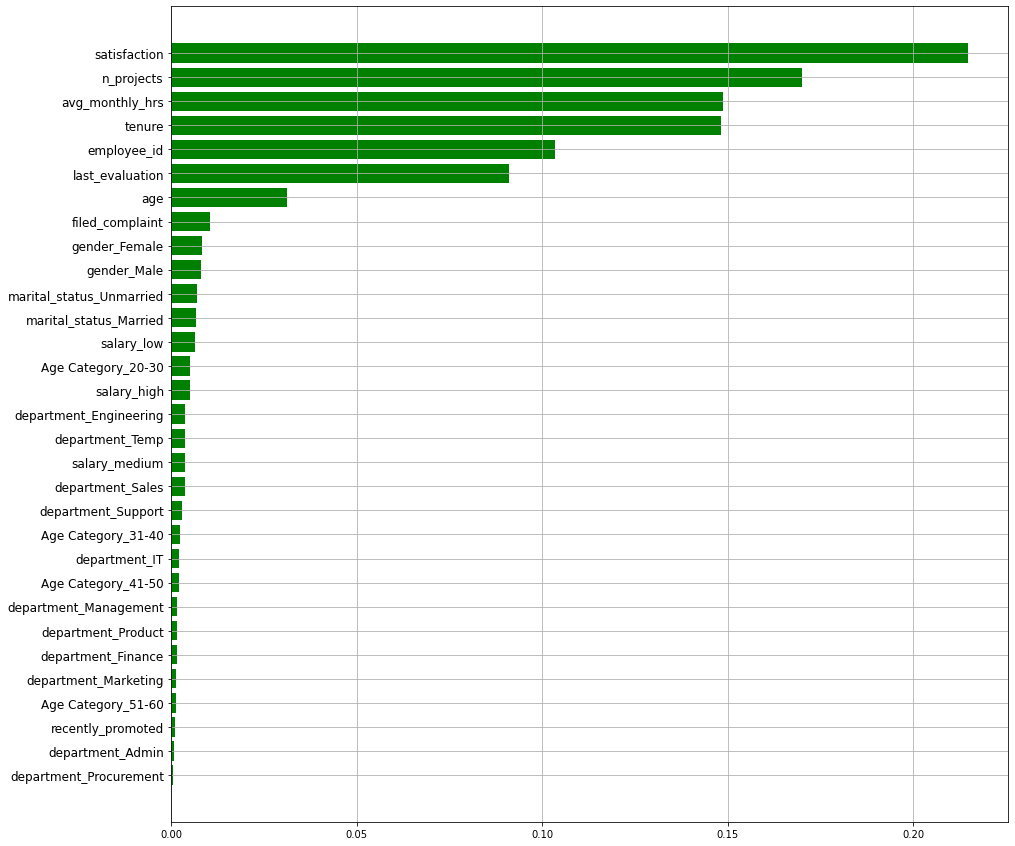

In [53]:

# ---- FEATURE IMPORTANCES ---

features = X_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=[15, 15])
plt.barh(y=range(len(indices)), width=importances[indices], color='g', align='center')
plt.yticks(ticks=range(len(indices)), labels=[features[i] for i in indices], size=12)
plt.grid(b=True)
plt.show()


**CHOOSING FEATURES**

Thus, we'll choose the following features for model creation:

*   statisfaction
*   n_projects
*   tenure
*   avg_monthly_hrs
*   last_evaluation


In [54]:
features = ['satisfaction', 'n_projects', 'tenure', 'avg_monthly_hrs', 'last_evaluation']

<a name = Section741></a>
### **7.4.1 X, y Creation and TTS, Again, after choosing the FEATURES based upon Feature Importances**

In [55]:
# Get X and y
#---------------------

X = X[features]
y = employeeData_df[targetVariable]

display(X.head())
display(X.shape)
display(y.shape)


# TTS
#------

# Train Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

# 80-20 train-test split
# default test_size=0.25
# random_state=seedvalue --> Setting this to a const int => You'll get the same shuffle everytime you run it


,satisfaction,n_projects,tenure,avg_monthly_hrs,last_evaluation
0,-1.39959,1.00000,1.00000,0.52222,0.53518
1,-0.38206,-1.00000,0.00000,-0.72222,-0.58663
2,-0.66828,-1.00000,0.00000,-0.47778,-0.88099
3,-1.34945,1.00000,1.00000,0.63333,0.87600
4,-0.58792,-1.00000,0.00000,-0.58889,-0.76104


(14116, 5)

(14116,)

<a name = Section742></a>
### **7.4.2 Scaling (Fit-Transform for Train, Transform for Test)**

In [56]:
#### SCALING ####

#### FIT_TRANSFORM (X_train) & TRANSFORM (X_test) ####
#### FIT => "Study"/ Learn | TRANSFORM => "Scale/Normalization" ###

# Read about MinMaxScaler, RobustScaler
# ROBUST SCALER because it is LESS PRONE to OUTLIERS

scaler = RobustScaler()

## FIT / TRAIN, and TRANSFORM / SCALE ###

# Now go and study i.e. fit() and give exam i.e. transform() on X_train
X_train[features] = scaler.fit_transform(X_train)

# Transform on X_test
X_test[features] = scaler.transform(X_test)

display("X_train Shape:", X_train.shape)
display("X_test Shape:", X_test.shape)
display("y_train Shape:", y_train.shape)
display("y_test Shape:", y_test.shape)

display("X_train:", X_train.head())
display("X_test", X_test.head())
display("y_train", y_train.head())
display("y_test", y_test.head())

'X_train Shape:'

(11292, 5)

'X_test Shape:'

(2824, 5)

'y_train Shape:'

(11292,)

'y_test Shape:'

(2824,)

'X_train:'

,satisfaction,n_projects,tenure,avg_monthly_hrs,last_evaluation
4001,-0.07087,0.00000,-1.00000,0.69663,0.77291
9375,0.44908,0.50000,1.00000,-0.35955,0.28566
13503,-0.68527,-1.00000,0.00000,-0.51685,-0.70082
3080,0.29623,0.50000,0.00000,0.92135,0.32449
11906,-0.03471,-0.50000,0.00000,-0.53933,-0.16196


'X_test'

,satisfaction,n_projects,tenure,avg_monthly_hrs,last_evaluation
13323,-0.25721,0.00000,0.00000,-0.11236,0.29964
6091,0.43834,0.00000,0.00000,0.15730,-0.30742
12987,-0.35426,-0.50000,0.00000,-0.75281,-0.35815
221,-0.67225,-1.00000,0.00000,-0.68539,-0.71213
33,-0.73908,-1.00000,0.00000,-0.73034,-0.99113


'y_train'

4001     0
9375     0
13503    1
3080     0
11906    0
Name: status, dtype: int64

'y_test'

13323    0
6091     0
12987    0
221      1
33       1
Name: status, dtype: int64

<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

- In this section we will **develop RandomForest using input features** and **tune** our **model if required**.

- Then we will **analyze the results** obtained and **make our observation**.

- For **evaluation purpose** we will **focus** on **Recall score**, also we will check for **Accuracy**, **Precision**, **F1-Score**, **Roc-Auc-Curve** and **Precision-Recall Curve**.



In [57]:
## Class to store important Model attributes

class MLClassifierModel:
  def __init__(self, moodel, features, scaler, X_train, y_train, X_test, y_test, caliberate_proba=True):
    self.uncaliberatedMoodel = moodel
    self.features = features
    self.scaler = scaler
    self.X_train = X_train
    self.y_train = y_train 
    self.X_test = X_test 
    self.y_test = y_test
    self.caliberate_proba = caliberate_proba

    # Extracting model name
    self.modelName = type(moodel).__name__


  
  ## This function returns an object of MLClassifierModel
  def RunModel(self):
    
    ## For understanding probability caliberation, please refer to:
    ## https://dataisblue.io/python/data_science/2020/02/16/calibrating-random-forest.html
    ## https://scikit-learn.org/stable/auto_examples/calibration/plot_calibration.html#sphx-glr-auto-examples-calibration-plot-calibration-py
    ##https://scikit-learn.org/stable/modules/calibration.html

    if self.caliberate_proba == True :
      self.modelObj = CalibratedClassifierCV(self.uncaliberatedMoodel, method='isotonic')
    else:
      self.modelObj = self.uncaliberatedMoodel
    
    
    # Calculating start time
    start_time = time.time()
    
    ## FITTING / TRAINING the MODEL
    self.modelObj.fit(self.X_train, self.y_train)

    # Calculating evaluated time for model fitting / training
    evaluated_time = time.time()-start_time
    # Print time taken for fitting/training the model
    print('Time taken for fitting/training', self.modelName ,' is: ', np.round(evaluated_time, 2), 'sec')
    print('----------------------------------------\n')

    ## Calculating the Scores
    y_pred_test = self.modelObj.predict(self.X_test)
    self.accuracy = accuracy_score(self.y_test,y_pred_test)
    self.precision = precision_score(self.y_test,y_pred_test)
    self.recall = recall_score(self.y_test,y_pred_test)
    self.f1 = f1_score(self.y_test,y_pred_test)
    self.roc = roc_curve(self.y_test,y_pred_test)
    self.precision_recall_curve = precision_recall_curve(self.y_test, y_pred_test)



  # Plot the roc-auc curve, and p-r-curve
  def PlotCurves(self):
    fpr_log,tpr_log,thres_log = self.roc
    log_precision, log_recall, log_thres = self.precision_recall_curve

    # ROC-AUC Curve
    fig, ax = plt.subplots(1,2,figsize=(20,6))
    ax[0].plot(fpr_log,tpr_log)
    ax[0].plot([0, 1], ls="--")
    ax[0].plot([0, 0], [1, 0] , c=".7")
    ax[0].plot([1, 1] , c=".7")
    ax[0].set_ylabel('True Positive Rate')
    ax[0].set_xlabel('False Positive Rate')

    # Precision-Recall Curve
    ax[1].plot(log_recall,log_precision)
    ax[1].plot([0, 1], ls="--")
    ax[1].plot([0, 0], [1, 0] , c=".7")
    ax[1].plot([1, 1] , c=".7")
    ax[1].set_ylabel('Precision')
    ax[1].set_xlabel('Recall')



  # Plot Confusion Matrix
  def PlotConfusionMatrix(self):
    # Plotting confusion maxtrix of train and test data
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 7))
    plot_confusion_matrix(estimator=self.modelObj, X=self.X_train, y_true=self.y_train, values_format='.5g', cmap='YlGnBu', ax=ax1)
    plot_confusion_matrix(estimator=self.modelObj, X=self.X_test, y_true=self.y_test, values_format='.5g', cmap='YlGnBu', ax=ax2)
    ax1.set_title(label='Train Data', size=14)
    ax2.set_title(label='Test Data', size=14)
    ax1.grid(b=False)
    ax2.grid(b=False)
    plt.suptitle(t='Confusion Matrix', size=16)
    plt.show()


<a name = Section81></a>

## **8.1 Logistic Regression**

In [58]:
### Logistic Regression Classification -- Baseline Model ###


logreg = LogisticRegression()

## Create Classifier Model object
classifier_logreg = MLClassifierModel(logreg, features, scaler, X_train, y_train, X_test, y_test)

## Run the model
classifier_logreg.RunModel()

Time taken for fitting/training LogisticRegression  is:  0.35 sec
----------------------------------------



### Checking Accuracy, Precsion, Recall, F1 scores

In [59]:
print('Accuracy score for test data is:', classifier_logreg.accuracy)
print('Precision score for test data is:', classifier_logreg.precision)
print('Recall score for test data is:', classifier_logreg.recall)

Accuracy score for test data is: 0.7847025495750708
Precision score for test data is: 0.5343915343915344
Recall score for test data is: 0.6121212121212121


### Checking F1-Score

- The F measure (F1 score or F score) is a **measure of a test’s accuracy** and is defined as **the weighted harmonic mean of the precision and recall of the test**.
- The F score can **provide a more realistic measure of a test’s performance** by **using both precision and recall**. 
- The F score is often **used in information retrieval** for measuring search, **document classification**, and **query classification performance**.

<center><img src="https://raw.githubusercontent.com/insaid2018/Term-2/master/images/f1.jpg" width="300" height="240" /></center>


In [60]:
print('F1 score for test data is:', classifier_logreg.f1)

F1 score for test data is: 0.5706214689265536


### Checking ROC-AUC Curve and Precision-Recall Curve

- ROC curve should not be used for **imbalanced data** as that can **interpret wrong result**. *If the model is performing good on the imbalanced data we should use precision-recall curve*.

- Because the **False Positive Rate ( False Positives / False Positives + True Negatives )** does **not drop drastically when the Total Real Negatives is huge**. 

- Whereas **Precision ( True Positives / (True Positives + False Positives) )** is **highly sensitive to False Positives and is not impacted by a large total real negative**.

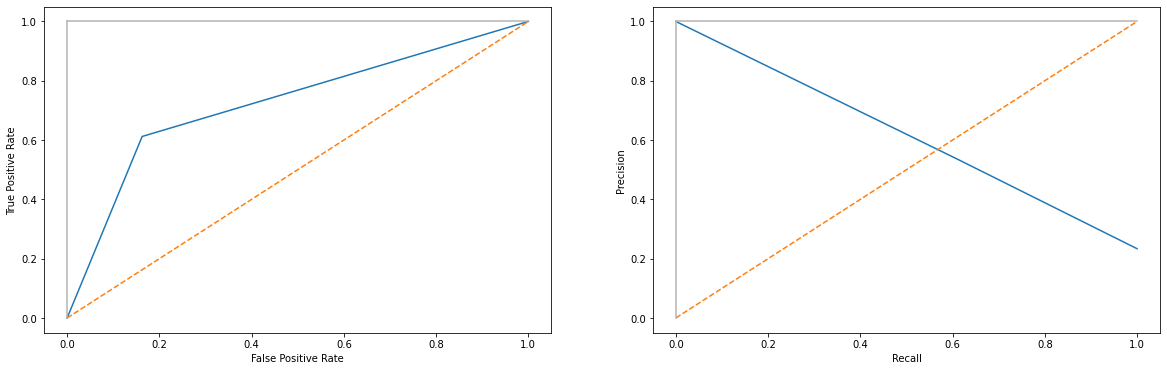

In [61]:
classifier_logreg.PlotCurves()

### Confusion Matrix

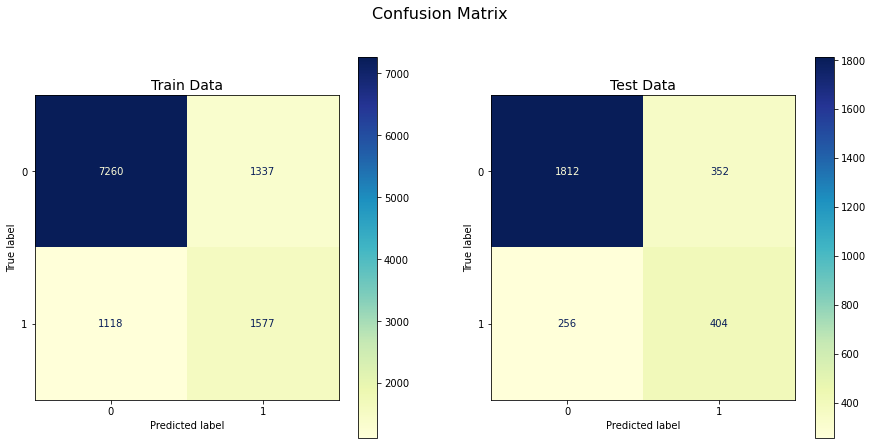

In [62]:
classifier_logreg.PlotConfusionMatrix()

<a name = Section82></a>

## **8.2 SVM**

In [63]:
### SVM Classifier ###
## https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python

svmModel = svm.SVC(kernel='rbf', probability=True) # Radial Basis Function Kernel

## Create Classifier Model object
classifier_svm = MLClassifierModel(svmModel, features, scaler, X_train, y_train, X_test, y_test)

## Run the model
classifier_svm.RunModel()

Time taken for fitting/training SVC  is:  18.29 sec
----------------------------------------



### Checking Accuracy, Precsion, Recall, F1 scores

In [64]:
print('Accuracy score for test data is:', classifier_svm.accuracy)
print('Precision score for test data is:', classifier_svm.precision)
print('Recall score for test data is:', classifier_svm.recall)

Accuracy score for test data is: 0.9688385269121813
Precision score for test data is: 0.9583333333333334
Recall score for test data is: 0.906060606060606


### Checking ROC-AUC Curve and Precision-Recall Curve

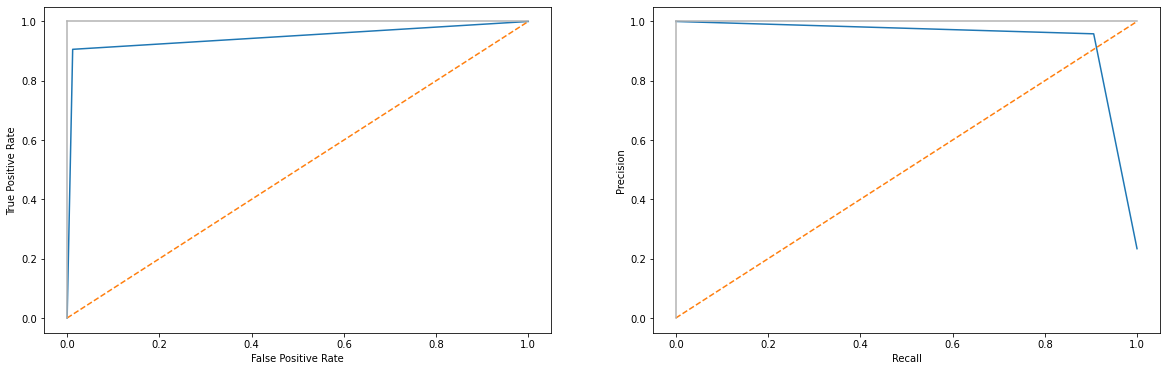

In [65]:
classifier_svm.PlotCurves()

### Confusion Matrix

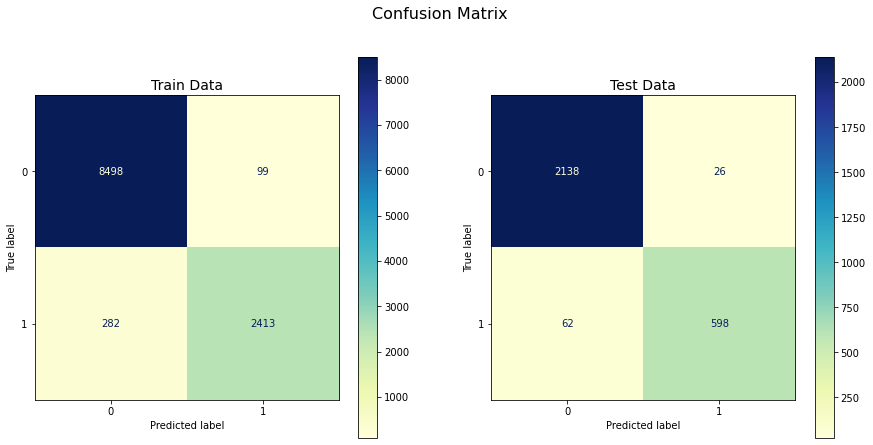

In [66]:
classifier_svm.PlotConfusionMatrix()

<a name = Section83></a>

## **8.3 KNN - Baseline Model**

In [67]:
### KNN Classification -- Baseline Model ###

knn = KNeighborsClassifier()

## Create Classifier Model object
classifier_knn = MLClassifierModel(knn, features, scaler, X_train, y_train, X_test, y_test)

## Run the model
classifier_knn.RunModel()

Time taken for fitting/training KNeighborsClassifier  is:  0.18 sec
----------------------------------------



### Checking Accuracy, Precsion, Recall, F1 scores

In [68]:
print('Accuracy score for test data is:', classifier_knn.accuracy)
print('Precision score for test data is:', classifier_knn.precision)
print('Recall score for test data is:', classifier_knn.recall)
print('F1 score for test data is:', classifier_knn.f1)

Accuracy score for test data is: 0.9716713881019831
Precision score for test data is: 0.967741935483871
Recall score for test data is: 0.9090909090909091
F1 score for test data is: 0.9374999999999999


### Checking ROC-AUC Curve and Precision-Recall Curve

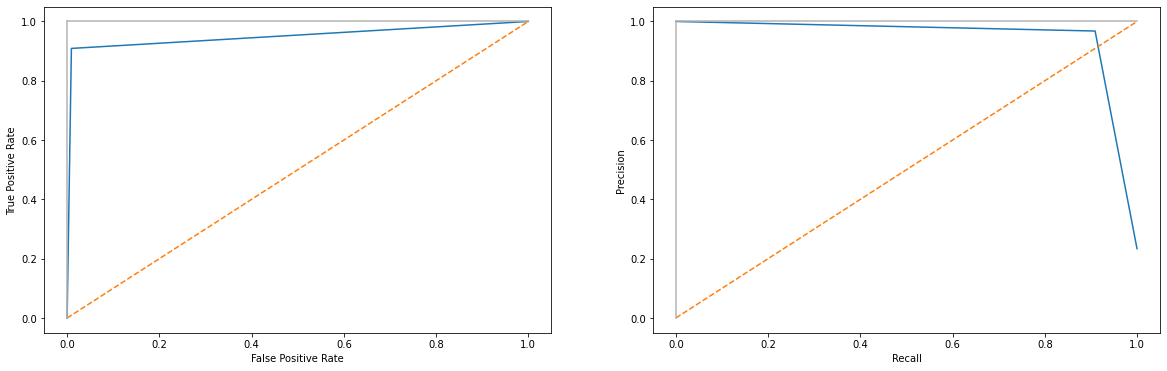

In [69]:
classifier_knn.PlotCurves()

### Confusion Matrix

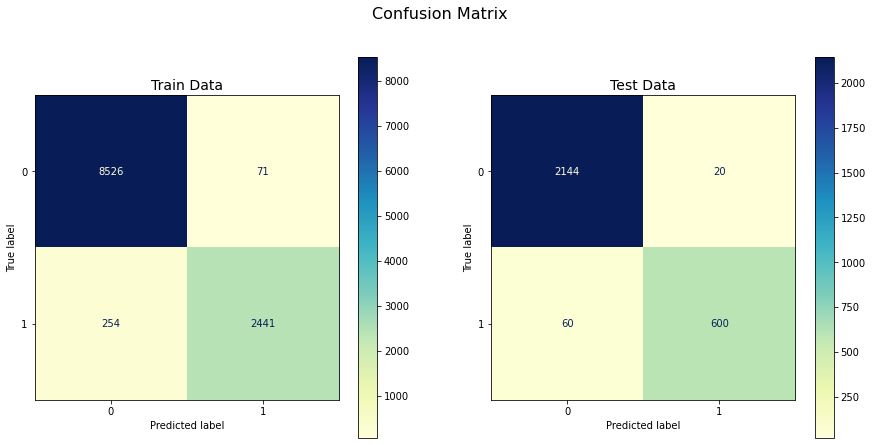

In [70]:
classifier_knn.PlotConfusionMatrix()

<a name = Section84></a>

## **8.4 Random Forest - Baseline Model**

In [71]:
### Random Forest Classification -- Baseline Model ###

model = RandomForestClassifier(random_state = 0)

## Create Classifier Model object
classifier_rf = MLClassifierModel(model, features, scaler, X_train, y_train, X_test, y_test)

## Run the model
classifier_rf.RunModel()

Time taken for fitting/training RandomForestClassifier  is:  5.98 sec
----------------------------------------



### Checking Accuracy, Precsion, Recall, F1 scores

In [72]:
print('Accuracy score for test data is:', classifier_rf.accuracy)
print('Precision score for test data is:', classifier_rf.precision)
print('Recall score for test data is:', classifier_rf.recall)

Accuracy score for test data is: 0.9776912181303116
Precision score for test data is: 0.9760765550239234
Recall score for test data is: 0.9272727272727272


In [73]:
print('F1 score for test data is:', classifier_rf.f1)

F1 score for test data is: 0.951048951048951


### Checking ROC-AUC Curve and Precision-Recall Curve

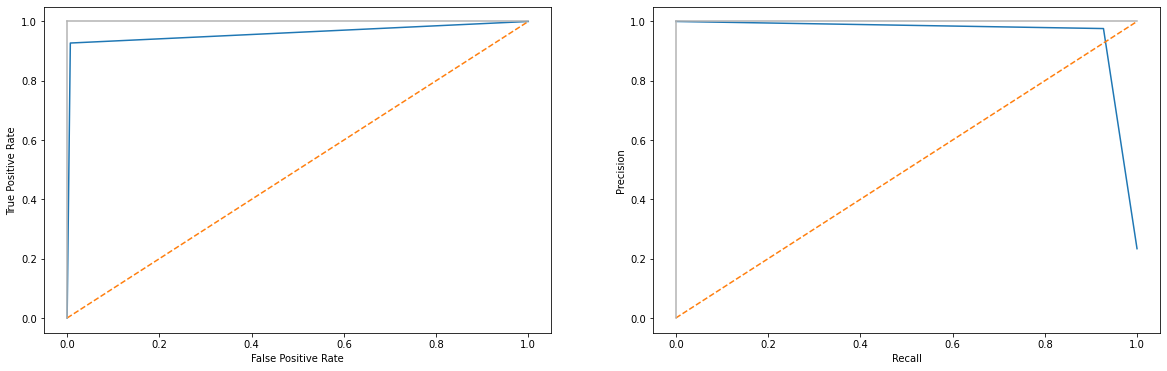

In [74]:
classifier_rf.PlotCurves()

**Observation:**

- We can **observe** a slight difference between **ROC-AUC CURVE** and **Precision-Recall Curve**.
- The **ROC-AUC Curve** on the left, shows **excellent performance**


### Confusion Matrix

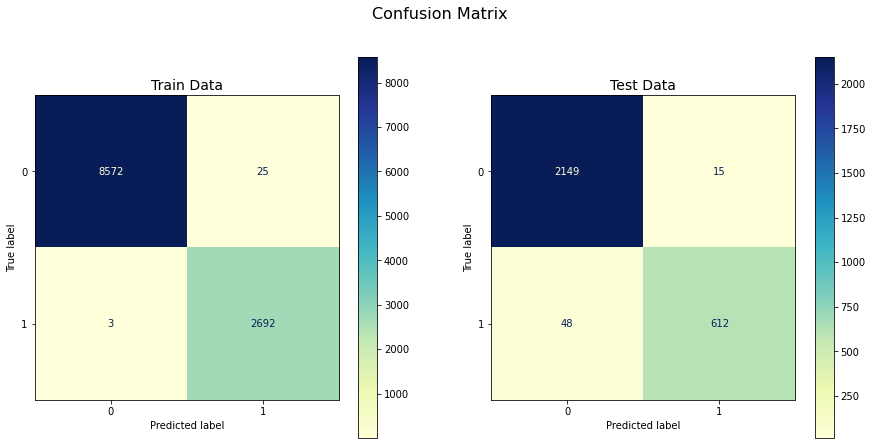

In [75]:
classifier_rf.PlotConfusionMatrix()

<a name = Section85></a>

## **8.5 Random Forest with RandomizedSearchCV**

Applying __RandomizedsearchCV__ method for __exhaustive search over specified parameter values__ of estimator.<br/>
To know more about the different parameters in random forest classifier, refer the [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). <br/>
Below we will apply gridsearch over the following parameters:
- criterion 
- max_depth 
- n_estimators
- min_samples_split
- min_samples_leaf

You can change other parameters also and compare the impact of it via calculating __accuracy score & confusion matrix__

In [76]:
# parameters for RandomearchCV
# specify parameters and distributions to sample from
param_dist = {"max_depth": [2,4,5],
              "min_samples_split": [2,4,7,9],
              "min_samples_leaf": [3,5,7,11],
              "bootstrap": [True, False],
              "n_estimators": [12,90,100,300,700],
              "criterion" : ["gini", "entropy"],
              'max_features': ['sqrt', 'log2', None]
             }
# run randomized search
n_iter_search = 50
random_search = RandomizedSearchCV(model, param_distributions = param_dist,
                                   n_iter = n_iter_search,
                                   n_jobs = -1)


In [77]:
## Random Forest RandomSearchCV

## Create Classifier Model object
classifier_rf_rscv = MLClassifierModel(
    random_search, features, scaler, X_train, y_train, X_test, y_test, caliberate_proba=False
    )

## Run the model
classifier_rf_rscv.RunModel()


Time taken for fitting/training RandomizedSearchCV  is:  399.34 sec
----------------------------------------



### Checking Accuracy, Precision, Recall, F1 Scores

In [78]:
print('Accuracy score for test data is:', classifier_rf_rscv.accuracy)
print('Precision score for test data is:', classifier_rf_rscv.precision)
print('Recall score for test data is:', classifier_rf_rscv.recall)


Accuracy score for test data is: 0.9713172804532578
Precision score for test data is: 0.966183574879227
Recall score for test data is: 0.9090909090909091


### Checking F1-Score

In [79]:
print('F1 score for test data is:', classifier_rf_rscv.f1)

F1 score for test data is: 0.936768149882904


### Checking ROC-AUC Curve and Precision-Recall Curve

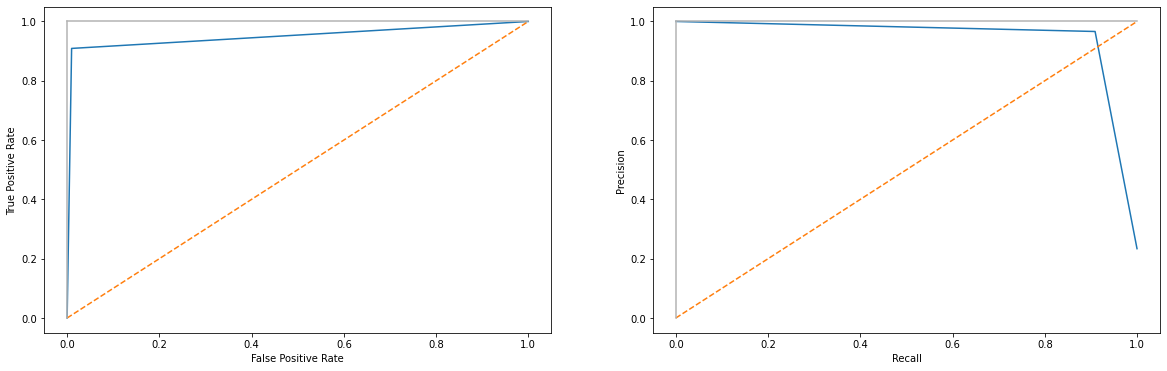

In [80]:
classifier_rf_rscv.PlotCurves()

### Confusion Matrix

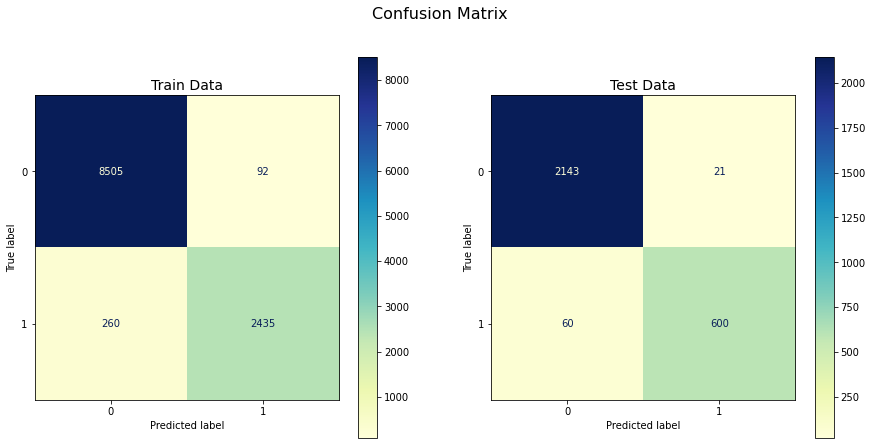

In [81]:
classifier_rf_rscv.PlotConfusionMatrix()

<a name = Section9></a>

---
# **9. Model Comparison**
---

<a name = Section91></a>

## **9.1 Scores Comparison**

In [82]:
classification_scores_dict = {
    'LogReg' : [classifier_logreg.accuracy, classifier_logreg.precision, classifier_logreg.recall, classifier_logreg.f1],
    'SVM' : [classifier_svm.accuracy, classifier_svm.precision, classifier_svm.recall, classifier_svm.f1],
    'KNN' : [classifier_knn.accuracy, classifier_knn.precision, classifier_knn.recall, classifier_knn.f1],
    'RF': [classifier_rf.accuracy, classifier_rf.precision, classifier_rf.recall, classifier_rf.f1],
    'RF RSCV':[classifier_rf_rscv.accuracy, classifier_rf_rscv.precision, classifier_rf_rscv.recall, classifier_rf_rscv.f1]}

scores_comparision_df = pd.DataFrame(classification_scores_dict, index=['Accuracy', 'Precision', 'Recall', 'F1'])

scores_comparision_df

,LogReg,SVM,KNN,RF,RF RSCV
Accuracy,0.78470,0.96884,0.97167,0.97769,0.97132
Precision,0.53439,0.95833,0.96774,0.97608,0.96618
Recall,0.61212,0.90606,0.90909,0.92727,0.90909
F1,0.57062,0.93146,0.93750,0.95105,0.93677


<a name = Section92></a>

## **9.2 K-FOLD CROSS VALIDATION**

- In this section, we will perform **cross-validation** to **estimate** the **performance** of our best models.
- Ideally we should compare between, RF, RF RandomizedSearchCV (RF Tuned), and KNN
- However RF RandomizedSearchCV has already gone through cross validation (CV => Cross Validation), so we can do a comparision between RF, and KNN
- Besides, doing a K-Fold CV on RF RandomizedSearchCV will take an inordinately long amount of time (experienced it myself)

In [83]:
models_to_cv = [classifier_rf.modelObj, classifier_knn.modelObj]

In [84]:

# Creating list of cv scores
cv_train_scores = []
cv_test_scores = []
cv_test_mean = []

for clf in models_to_cv:

  # Extracting model name
  model_name = type(clf).__name__

  # Calculating scores using cross validation
  # Using KFold() with 5 folds
  scores = cross_validate(estimator=clf,
                          X=X_train,
                          y=y_train,
                          cv=KFold(n_splits=5, random_state=42, shuffle=True), 
                          scoring='accuracy', 
                          return_train_score=True)

  # scores is a dictionary with keys like test_score, train_score, fit_time, etc
  # We will extract test_score and append it to our cv_scores list
  cv_train_scores.append(scores['train_score'])
  cv_test_scores.append(scores['test_score'])

  # Calculating the mean of scores for both the models
  cv_test_mean.append((scores['test_score'].mean()))


- We will create a **plot** for **accuracy** vs **number of folds**.

In [85]:

# Repeating the mean values 5 times for plotting purposes
cv_mean_list = [[i*100]*5 for i in cv_test_mean]

# Initializing two lists
names = ['Train', 'Test']
col_num = [1, 2]

# Creating a list of folds
folds = list(range(1, 6))

# Initiate subplots
fig = make_subplots(rows=1,
                    cols=2,
                    x_title='Fold Number',
                    y_title='Accuracy (%)',
                    subplot_titles=( 
                                    "Random Forest Baseline: Accuracy vs Folds",
                                    "KNN: Accuracy vs Folds"
                                    ))

# Train scores are stored in cv_train_scores
# Test scores are stored in cv_test_scores
# Mean scores are stored in cv_mean_list

# Display train, test and mean scores for both the models
for i, j, k, cols in zip(cv_train_scores, cv_test_scores, cv_mean_list, col_num):

  # Plotting the training scores
  fig.add_trace(trace=go.Scatter(x=folds,
                                 y=i*100,
                                 mode='lines+markers',
                                 hoverinfo='all',
                                 name=names[0]),
                                 row=1,
                                 col=cols)

  # Plotting the test scores
  fig.add_trace(trace=go.Scatter(x=folds,
                                 y=j*100,
                                 mode='lines+markers',
                                 hoverinfo='all',
                                 name=names[1]),
                                 row=1,
                                 col=cols)

  # Plotting the mean scores
  fig.add_trace(trace=go.Scatter(x=folds,
                                 y=k,
                                 mode='lines',
                                 hoverinfo='all',
                                 name='Mean',
                                 line=dict(dash='dash')),
                                 row=1,
                                 col=cols)

# Update the layout with some cosmetics
fig.update_layout(height=500, 
                  width=1000, 
                  title_text='Accuracy vs number of folds', 
                  title_x=0.5)

fig.update_yaxes(tick0=5)

# Display the figure
fig.show()

<a name = Section10></a>

---
# **10. Final Submission (predictions on unseen data)**
---

<a name = Section101></a>

## **10.1 Loading unseen data + Analysis**

In [86]:
#------ UNSEEN DATA Loading ------
employee_unseen_data = pd.read_csv('https://raw.githubusercontent.com/ruchit-sengupta/ml-insaid-gcdai-capstone/main/GCD_Capstone_Project_unseen_data%20-%20GCD_Capstone_Project_unseen_data.csv')
print('************ UNSEEN DATA ************\n\n')
print('Shape:', employee_unseen_data.shape)

display(employee_unseen_data.head())

print('\n================Describe ================')
print('===========================================\n')
display(employee_unseen_data.describe(include='all'))

print('\n\n================ Info ===================')
print('=============================================\n')
display(employee_unseen_data.info())

************ UNSEEN DATA ************


Shape: (100, 10)


,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,employee_id
0,134,D00-IT,NaN,0.52884,2,NaN,low,0.40046,3.00000,119045
1,221,D00-PD,NaN,0.78456,2,NaN,low,0.75951,3.00000,112223
2,156,D00-SS,NaN,0.54518,2,NaN,medium,0.33646,3.00000,103924
3,133,D00-PR,NaN,NaN,4,NaN,medium,0.83204,2.00000,105922
4,135,D00-SS,NaN,0.45464,2,NaN,low,0.32072,5.00000,103297



================Describe ================



,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,employee_id
count,100.00000,98,15.00000,83.00000,100.00000,3.00000,100,97.00000,97.00000,100.00000
unique,NaN,12,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN
top,NaN,D00-SS,NaN,NaN,NaN,NaN,low,NaN,NaN,NaN
freq,NaN,27,NaN,NaN,NaN,NaN,45,NaN,NaN,NaN
mean,198.81000,NaN,1.00000,0.74411,3.76000,1.00000,NaN,0.62963,3.42268,112515.75000
std,53.18572,NaN,0.00000,0.16954,1.34930,0.00000,NaN,0.24690,1.56681,9466.67672
min,68.00000,NaN,1.00000,0.39680,1.00000,1.00000,NaN,0.05152,2.00000,100230.00000
25%,154.50000,NaN,1.00000,0.57618,3.00000,1.00000,NaN,0.47700,2.00000,105855.00000
50%,206.00000,NaN,1.00000,0.74813,4.00000,1.00000,NaN,0.66083,3.00000,110557.00000
75%,247.50000,NaN,1.00000,0.90146,5.00000,1.00000,NaN,0.83204,4.00000,117130.25000




================ Info ===================

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    100 non-null    int64  
 1   department         98 non-null     object 
 2   filed_complaint    15 non-null     float64
 3   last_evaluation    83 non-null     float64
 4   n_projects         100 non-null    int64  
 5   recently_promoted  3 non-null      float64
 6   salary             100 non-null    object 
 7   satisfaction       97 non-null     float64
 8   tenure             97 non-null     float64
 9   employee_id        100 non-null    int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 7.9+ KB


None


**Observations from Unseen Data**


- We see that some columns have very few data (remove), and some have missing data.
- We need to perform data cleaning + data prepping in similar lines as of the training data.
- Only difference is that we don't have an o/p label / target variable.
- We need to predict the probabilities in that case
- Everything else in the ML pipeline remains the same.

https://stackoverflow.com/questions/64759579/predicting-unseen-data-on-target-variable-based-encoding-technique


<a name = Section102></a>

## **10.2 Data Cleaning and Prepping for Prediction**

In [87]:
## INIT
## MAKE A COPY (to retain the original dataset)
X_unseen = employee_unseen_data.copy()

<a name = Section1021></a>
#### **10.2.1. Drop duplicates (if any)**

In [88]:
X_unseen.drop_duplicates(subset ="employee_id", inplace = True)
X_unseen.shape

(100, 10)

<a name = Section1022></a>
#### **10.2.2. Identification & Handling of Missing Data**

- In this section we will **analyze** and **identify** **missing information** such as **null data** and **zero data**.
- We will only consider data imputation for the ones under the features we chose in section 7.5 of this notebook, that is:
- satisfaction, n_projects, tenure, avg_monthly_hrs, last_evaluation

In [89]:
# Mean because of almost nill skew
mean_last_evaluation = X_unseen.last_evaluation.mean()#calculating the mean of the last_evaluation
X_unseen.last_evaluation.fillna(mean_last_evaluation, inplace = True)#filling null values with the mean

# Median, because of the skew
median_satisfaction = X_unseen.satisfaction.median()#calculating the median of the satisfaction
X_unseen.satisfaction.fillna(median_satisfaction, inplace = True)#filling null values with the median

# Median, because of the skew
median_tenure = X_unseen.tenure.median()#calculating the median of the tenure
X_unseen.tenure.fillna(median_tenure, inplace = True)#filling null values with the median of tenure


<a name = Section1023></a>
#### **10.2.3. One Hot Encoding of Categorical Data**

None of the features chosen from 7.5 are categorical. 
That is:
satisfaction, n_projects, tenure, avg_monthly_hrs, last_evaluation
So, we can safely skip this part


<a name = Section1024></a>
#### **10.2.4. Scaling**

In [90]:
#### SCALING ####

## VERY IMPORTANT !! ##
### Here, because this is unseen data, we are gonna use only the TRANSFORM part

## We'll use the scaler object that was fit_transform-ed on the training data in 7.7
scaler_unseen_data = classifier_rf.scaler

#display(features)

## features --> Obtained from section 7.5

# Transform on Unseen data
X_unseen[features] = scaler_unseen_data.transform(X_unseen[features])

display("X_unseen Shape:", X_unseen.shape)
display("X_unseen", X_unseen.head())

'X_unseen Shape:'

(100, 10)

'X_unseen'

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,employee_id
0,135.50562,D00-IT,NaN,0.52737,2.00000,NaN,low,0.40094,3.00000,119045
1,223.48315,D00-PD,NaN,0.78237,2.00000,NaN,low,0.76042,3.00000,112223
2,157.75281,D00-SS,NaN,0.54366,2.00000,NaN,medium,0.33686,3.00000,103924
3,134.49438,D00-PR,NaN,0.74204,4.00000,NaN,medium,0.83304,2.00000,105922
4,136.51685,D00-SS,NaN,0.45337,2.00000,NaN,low,0.32111,5.00000,103297


<a name = Section103></a>

## **10.3 Final Predictions**

In [91]:
#predicting on unseen data

## INIT
proba_left_column = 'Probability of Leaving the company'

## model = Baseline RF. We found in section 9, that the Baseline RF gives better performance
y_pred_unseen = classifier_rf.modelObj.predict_proba(X_unseen[features])

employee_unseen_data_pred = X_unseen.copy()
classLeft = 1
employee_unseen_data_pred[proba_left_column] = y_pred_unseen[:,classLeft]
employee_unseen_data_predictions = employee_unseen_data_pred[ ['employee_id', proba_left_column] ]

# rounding to 2 decimal places 
# (as given in the example here: https://projects.insaid.co/capstone2/index.php)
employee_unseen_data_predictions[proba_left_column] = employee_unseen_data_pred[proba_left_column].astype(float).round(2)

# Display
display(employee_unseen_data_predictions.head(20))

,employee_id,Probability of Leaving the company
0,119045,0.63000
1,112223,0.73000
2,103924,0.78000
3,105922,0.68000
4,103297,0.51000
5,115525,0.73000
6,116409,0.69000
7,109427,0.64000
8,118590,0.69000
9,107075,0.64000


<a name = Section104></a>

## **10.4 Saving it to CSV**

In the format given by INSAID, here:
https://projects.insaid.co/capstone2/index.php


In [95]:
employee_unseen_data_predictions.to_csv('1011_GCD_Capstone_Project_predicted_probabilities.csv', index=False, header=False)

In [96]:
## NOTE! Use the following code snippet, only if you are using Google Colab, otherwise remove/comment it ##

from google.colab import files                   
files.download('1011_GCD_Capstone_Project_predicted_probabilities.csv')      



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---
THE END
---
---